In [1]:
#installing new library with !pip
!pip install xgboost

In [2]:
#pandas is a one of the library ,its use to read the database like excel and number related files , 
#it is used for separating the input and output data se
#importng the xgboost library
import xgboost
import pandas as pd

In [3]:
# readed dataset
dataset=pd.read_csv("insurance_pre.csv")

In [4]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [5]:
# herewe are changing the catagrical input to numerical input 
# new function
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
# this is a new function for reading the input and output names
#then here we are separating the input and output with the variables
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
#then here we are separating the input and output with the variables
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dependent=dataset[["charges"]]

In [8]:
#sklearn is also one of the library ,we are going to use the libray in every machine learnin project ,its like a default 
#library for ML
#here we are separating the input and output dataset for training and testing prpose ,we are taking 70% for training and 30% for testing testin
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent, dependent, test_size=0.3, random_state=0)

In [13]:
#creating module for XGBRegressor with XGboost library and applying the parameters 
from xgboost import XGBRegressor
regressor=XGBRegressor(n_estimators=100, max_depth=1,random_state=0)
regressor.fit(X_train,Y_train)
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [14]:
#here we are predicting the value of teste input with the created module
y_prediction=regressor.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,y_prediction)
r_score

0.7955664171537913

In [16]:
#importing pickle library
#and saving the best module
import pickle
filename="XGBRegressor.sav"
pickle.dump(regressor,open(filename,"wb"))

In [19]:
# here we are checking our module how it's working again once
loaded_module=pickle.load(open("XGBRegressor.sav","rb"))
result=loaded_module.predict([[19,27.900,0,0,1]])
result

array([24406.213], dtype=float32)

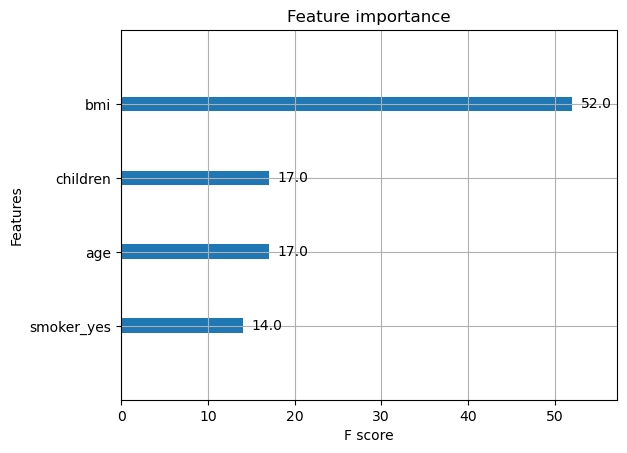

In [26]:
from xgboost import plot_importance
plot_importance(regressor)
plt.show()